In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/muffin-vs-chihuahua-image-classification/test/muffin/img_3_835.jpg
/kaggle/input/muffin-vs-chihuahua-image-classification/test/muffin/img_2_138.jpg
/kaggle/input/muffin-vs-chihuahua-image-classification/test/muffin/img_3_570.jpg
/kaggle/input/muffin-vs-chihuahua-image-classification/test/muffin/img_1_210.jpg
/kaggle/input/muffin-vs-chihuahua-image-classification/test/muffin/img_1_581.jpg
/kaggle/input/muffin-vs-chihuahua-image-classification/test/muffin/img_1_920.jpg
/kaggle/input/muffin-vs-chihuahua-image-classification/test/muffin/img_1_547.jpg
/kaggle/input/muffin-vs-chihuahua-image-classification/test/muffin/img_2_819.jpg
/kaggle/input/muffin-vs-chihuahua-image-classification/test/muffin/img_2_821.jpg
/kaggle/input/muffin-vs-chihuahua-image-classification/test/muffin/img_0_591.jpg
/kaggle/input/muffin-vs-chihuahua-image-classification/test/muffin/img_4_1.jpg
/kaggle/input/muffin-vs-chihuahua-image-classification/test/muffin/img_3_239.jpg
/kaggle/input/muffin-vs-chihua

In [2]:
import tensorflow as tf
from tensorflow.keras.applications.vgg19 import VGG19
from tensorflow.keras.layers import Flatten, Dense, Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input
from tensorflow.keras.models import Model

In [3]:
base_model = VGG19(include_top=False,
                  weights='imagenet',
                  input_shape=(150, 150, 3),
                  classes=2)
for layer in base_model.layers[10:]:
    layer.trainable = False

inputs = base_model.output
x = Flatten()(inputs)
x = Dense(512, 'relu')(x)
x = Dense(256, 'relu')(x)
outputs = Dense(2, 'softmax')(x)

model = Model(base_model.inputs, outputs)

model.summary()

2023-02-07 23:15:20.046283: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-02-07 23:15:20.047320: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-02-07 23:15:20.172409: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-02-07 23:15:20.173436: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-02-07 23:15:20.174321: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from S

80150528/80134624 [==============================] - 0s 0us/step
Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 150, 150, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 150, 150, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 150, 150, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 75, 75, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 75, 75, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 75, 75, 128)       147584    
______________________________________________________________

In [4]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [5]:
train_dir = '/kaggle/input/muffin-vs-chihuahua-image-classification/train'
test_dir = '/kaggle/input/muffin-vs-chihuahua-image-classification/test'

train_datagen = ImageDataGenerator(rotation_range=40,
                                  width_shift_range=0.2,
                                  height_shift_range=0.2,
                                  zoom_range=0.2,
                                  horizontal_flip=True,
                                  rescale=1/255.0)
test_datagen = ImageDataGenerator(rescale=1./255)

train_data = train_datagen.flow_from_directory(train_dir,
                                              target_size=(150, 150),
                                              class_mode='categorical')

test_data = test_datagen.flow_from_directory(test_dir,
                                            target_size=(150, 150),
                                            class_mode='categorical',
                                             shuffle=False)

Found 4733 images belonging to 2 classes.
Found 1184 images belonging to 2 classes.


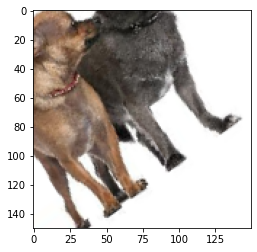

In [6]:
import matplotlib.pyplot as plt

plt.imshow(train_data[0][0][0])

In [7]:
model.compile(loss='categorical_crossentropy',
                   optimizer='adam',
                   metrics=['accuracy'])

model.fit(train_data,
               validation_data=test_data,
               epochs=10)

2023-02-07 23:15:28.136593: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/10


2023-02-07 23:15:31.644923: I tensorflow/stream_executor/cuda/cuda_dnn.cc:369] Loaded cuDNN version 8005


148/148 [==============================] - 150s 906ms/step - loss: 0.7222 - accuracy: 0.5912 - val_loss: 0.5747 - val_accuracy: 0.7002
Epoch 2/10
148/148 [==============================] - 113s 765ms/step - loss: 0.4102 - accuracy: 0.8175 - val_loss: 0.3169 - val_accuracy: 0.8716
Epoch 3/10
148/148 [==============================] - 113s 764ms/step - loss: 0.3291 - accuracy: 0.8654 - val_loss: 0.2726 - val_accuracy: 0.8936
Epoch 4/10
148/148 [==============================] - 113s 762ms/step - loss: 0.3107 - accuracy: 0.8743 - val_loss: 0.2867 - val_accuracy: 0.8927
Epoch 5/10
148/148 [==============================] - 112s 759ms/step - loss: 0.2900 - accuracy: 0.8817 - val_loss: 0.2641 - val_accuracy: 0.8995
Epoch 6/10
148/148 [==============================] - 113s 762ms/step - loss: 0.2679 - accuracy: 0.8931 - val_loss: 0.2146 - val_accuracy: 0.9164
Epoch 7/10
148/148 [==============================] - 112s 759ms/step - loss: 0.2356 - accuracy: 0.9053 - val_loss: 0.2085 - val_accura

In [8]:
!wget 'https://www.allthingsdogs.com/wp-content/uploads/2020/06/Pitbull-Chihuahua-Mix-Puppy-150x150.jpg'

--2023-02-07 23:35:35--  https://www.allthingsdogs.com/wp-content/uploads/2020/06/Pitbull-Chihuahua-Mix-Puppy-150x150.jpg
Resolving www.allthingsdogs.com (www.allthingsdogs.com)... 172.67.74.234, 104.26.5.222, 104.26.4.222, ...
Connecting to www.allthingsdogs.com (www.allthingsdogs.com)|172.67.74.234|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 5397 (5.3K) [image/jpeg]
Saving to: ‘Pitbull-Chihuahua-Mix-Puppy-150x150.jpg’

Pitbull-Chihuahua-M 100%[===================>]   5.27K  --.-KB/s    in 0s      

2023-02-07 23:35:36 (36.8 MB/s) - ‘Pitbull-Chihuahua-Mix-Puppy-150x150.jpg’ saved [5397/5397]



/kaggle/working


TensorShape([1, 150, 150, 3])

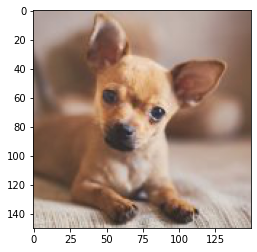

In [14]:
!pwd
image_path = '/kaggle/working/Pitbull-Chihuahua-Mix-Puppy-150x150.jpg'
img = plt.imread(image_path)
plt.imshow(img)
img = tf.image.resize(img, (150, 150))
img = tf.cast(img, tf.float32)
img = tf.expand_dims(img, 0)
img.shape

In [15]:
model.predict(img)

array([[2.3468831e-23, 1.0000000e+00]], dtype=float32)

In [33]:
#plt.imshow(test_data[0][0][6])
preds = model.predict(test_data[0][0])
for pred in preds:
    if np.argmax(pred) == 0:
        print('Chihuahua')
    else:
        print('Muffin')

Chihuahua
Chihuahua
Chihuahua
Chihuahua
Chihuahua
Chihuahua
Chihuahua
Muffin
Chihuahua
Muffin
Chihuahua
Chihuahua
Chihuahua
Chihuahua
Chihuahua
Chihuahua
Chihuahua
Chihuahua
Chihuahua
Chihuahua
Chihuahua
Chihuahua
Muffin
Chihuahua
Chihuahua
Chihuahua
Muffin
Chihuahua
Chihuahua
Chihuahua
Chihuahua
Chihuahua
